In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
input_data_100 = pd.read_excel("alternative_inputs/Inputdata_2030_100.xlsx", index_col="Code", keep_default_na=False)

In [5]:
export_limit = 0
export_limits = []
h2_ship = []
h2_pipeline = []
nh3_ship = []
nh3_pipeline = []
ch3oh_ship = []
ch3oh_pipeline = []

while 0 <= export_limit <= 0.1:
    input_data = input_data_100.copy()
    input_data["H2 Export Limit"] = export_limit*input_data["H2 Export Limit"]
    input_data["NH3 Export Limit"] = export_limit*input_data["NH3 Export Limit"]
    input_data["CH3OH Export Limit"] = export_limit*input_data["CH3OH Export Limit"]
    
    input_data.to_excel("alternative_inputs/export_limit_input.xlsx")
    
    model = hydro_opt(input_data="alternative_inputs/export_limit_input.xlsx")
    try:
        model.optimize()
        df = model.results_df
        h2_ship.append(df[(df['H2 Schiff']>0)].index.to_list())
        h2_pipeline.append(df[(df['H2 Pipeline']>0)].index.to_list())
        nh3_ship.append(df[(df['NH3 Schiff']>0)].index.to_list())
        nh3_pipeline.append(df[(df['NH3 Pipeline']>0)].index.to_list())
        ch3oh_ship.append(df[(df['CH3OH Schiff']>0)].index.to_list())
        ch3oh_pipeline.append(df[(df['CH3OH Pipeline']>0)].index.to_list())

        export_limits.append(export_limit)
    except:
        print(export_limit)
        pass
    
    export_limit += 0.0001
    

model.name="unknown";
    - termination condition: infeasible
    - message from solver: Model was proven to be infeasible.
0
0.0001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0010000000000000002
0.0011000000000000003
0.0012000000000000003
0.0013000000000000004
0.0014000000000000004
0.0015000000000000005
0.0016000000000000005
0.0017000000000000006
0.0018000000000000006
0.0019000000000000006
0.0020000000000000005
0.0021000000000000003
0.0022
0.0023
0.0024
0.0024999999999999996
0.0025999999999999994
0.0026999999999999993
0.002799999999999999
0.002899999999999999
0.0029999999999999988
0.0030999999999999986
0.0031999999999999984
0.0032999999999999982
0.003399999999999998
0.003499999999999998
0.0035999999999999977
0.0036999999999999976
0.0037999999999999974
0.0038999999999999972
0.0039999999999999975
0.004099999999999998
0.004199999999999998
0.004299999999999998
0.0043999999999999985
0.004499999999999

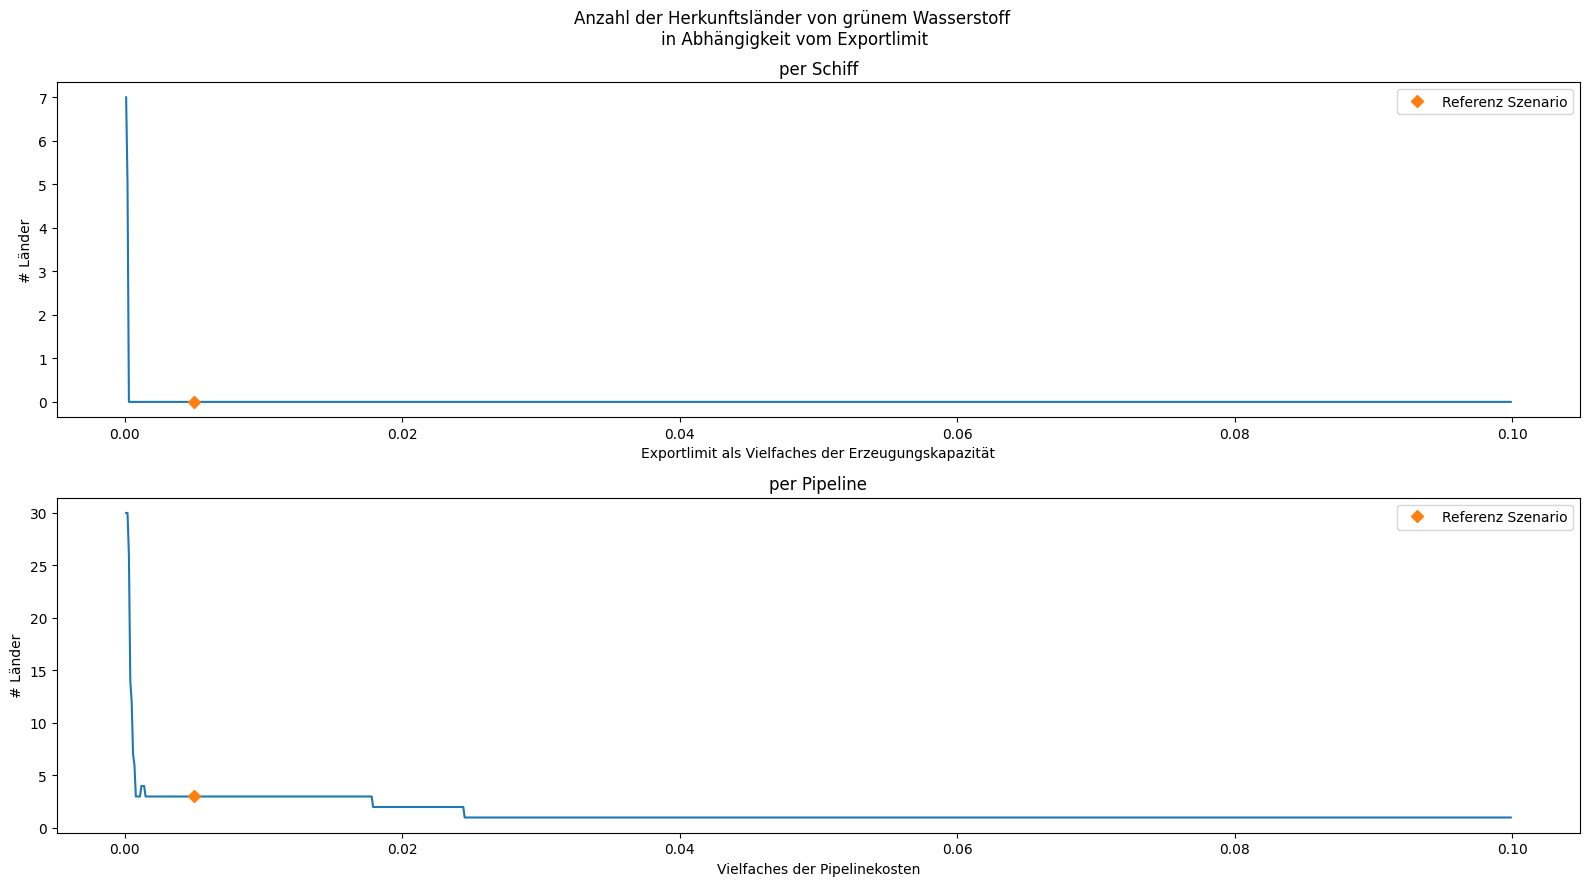

In [17]:
fig, ax = plt.subplots(2,1, figsize=(16,9))
fig.suptitle("Anzahl der Herkunftsländer von grünem Wasserstoff \nin Abhängigkeit vom Exportlimit")
ax[0].plot(export_limits[1:], [len(x) for x in h2_ship][1:])
ax[0].set_title("per Schiff")
ax[0].set_xlabel("Exportlimit als Vielfaches der Erzeugungskapazität")
ax[0].set_ylabel("# Länder")
ax[0].plot(0.005,0, "D", label='Referenz Szenario')
#ax[0].plot(3,0, "s", label='Nachfrage Szenario')
ax[0].legend()


ax[1].plot(export_limits[1:], [len(x) for x in h2_pipeline][1:])
ax[1].set_title("per Pipeline")
ax[1].set_xlabel("Vielfaches der Pipelinekosten")
ax[1].set_ylabel("# Länder")
ax[1].plot(0.005,3, "D", label='Referenz Szenario')
#ax[1].plot(3,3, "s", label='Nachfrage Szenario')
ax[1].legend()

plt.tight_layout()
plt.savefig("Exportlimit - Anzahl Länder", bbox_inches="tight")

In [9]:
export_limits

[0,
 0.0001,
 0.0002,
 0.00030000000000000003,
 0.0004,
 0.0005,
 0.0006000000000000001,
 0.0007000000000000001,
 0.0008000000000000001,
 0.0009000000000000002,
 0.0010000000000000002,
 0.0011000000000000003,
 0.0012000000000000003,
 0.0013000000000000004,
 0.0014000000000000004,
 0.0015000000000000005,
 0.0016000000000000005,
 0.0017000000000000006,
 0.0018000000000000006,
 0.0019000000000000006,
 0.0020000000000000005,
 0.0021000000000000003,
 0.0022,
 0.0023,
 0.0024,
 0.0024999999999999996,
 0.0025999999999999994,
 0.0026999999999999993,
 0.002799999999999999,
 0.002899999999999999,
 0.0029999999999999988,
 0.0030999999999999986,
 0.0031999999999999984,
 0.0032999999999999982,
 0.003399999999999998,
 0.003499999999999998,
 0.0035999999999999977,
 0.0036999999999999976,
 0.0037999999999999974,
 0.0038999999999999972,
 0.0039999999999999975,
 0.004099999999999998,
 0.004199999999999998,
 0.004299999999999998,
 0.0043999999999999985,
 0.004499999999999999,
 0.004599999999999999,
 0.00

In [24]:
len(h2_pipeline[1])

30

In [21]:
dict(zip(export_limits, h2_pipeline))

{0: [],
 0.0001: ['DZ',
  'AT',
  'AZ',
  'BE',
  'CZ',
  'DK',
  'EE',
  'FI',
  'FR',
  'GR',
  'HU',
  'IE',
  'IT',
  'LY',
  'LT',
  'MA',
  'NL',
  'NO',
  'PL',
  'PT',
  'RO',
  'SK',
  'SI',
  'ES',
  'SE',
  'CH',
  'TN',
  'TR',
  'TM',
  'GB'],
 0.0002: ['DZ',
  'AT',
  'AZ',
  'BE',
  'CZ',
  'DK',
  'EE',
  'FI',
  'FR',
  'GR',
  'HU',
  'IE',
  'IT',
  'LY',
  'LT',
  'MA',
  'NL',
  'NO',
  'PL',
  'PT',
  'RO',
  'SK',
  'SI',
  'ES',
  'SE',
  'CH',
  'TN',
  'TR',
  'TM',
  'GB'],
 0.00030000000000000003: ['DZ',
  'AT',
  'BE',
  'CZ',
  'DK',
  'EE',
  'FI',
  'FR',
  'HU',
  'IT',
  'LY',
  'LT',
  'MA',
  'NL',
  'NO',
  'PL',
  'PT',
  'RO',
  'SK',
  'SI',
  'ES',
  'SE',
  'CH',
  'TN',
  'TR',
  'GB'],
 0.0004: ['BE',
  'DK',
  'FI',
  'FR',
  'IT',
  'LY',
  'MA',
  'NL',
  'NO',
  'PT',
  'ES',
  'SE',
  'CH',
  'TR'],
 0.0005: ['DK',
  'FI',
  'FR',
  'IT',
  'MA',
  'NL',
  'NO',
  'PT',
  'ES',
  'SE',
  'CH',
  'TR'],
 0.0006000000000000001: ['DK', 'FR'